In [4]:
import matplotlib.pyplot as plt
import numpy as np
import nidaqmx
import math
import time
import pandas as pd
import os
import datetime


In [5]:
carpeta = ""
datos_medicion = pd.read_csv(carpeta + "datos_array29_13_52_55.csv")

In [ ]:
datos_medicion

In [7]:
df = datos_medicion 
i = 1
df["H"][i][1:-1]


'0.21754032842264037, 0.2145785212433754, 0.2121103486143316, 0.20881945180429512, 0.20569309986504297, 0.20141493410108485, 0.1986176719004778, 0.19565586489003123, 0.19252951307403288, 0.18858043713742886, 0.18594771987201383, 0.1826568233190128, 0.17920138197265711, 0.17541685101443766, 0.17261958902874283, 0.1698223270658436, 0.1655441617547689, 0.16192417576368326, 0.1587978242563271, 0.15616510721928534, 0.15205148688864797, 0.14892513546966785, 0.1451406048417745, 0.14184970867659835, 0.13839426773607466, 0.13460973722071096, 0.1313188411530299, 0.12835703471798315, 0.1242434147098131, 0.12062342914143931, 0.11749707799788504, 0.11371254770220593, 0.11075074141124953, 0.10663712160245933, 0.10318168099867084, 0.10005533000409332, 0.09659988946186293, 0.09297990416638127, 0.08968900847371296, 0.08639811280998207, 0.08277812761317702, 0.07899359767185278, 0.0752090677683525, 0.0720827170069212, 0.06879182149624377, 0.06533638124046569, 0.06122276192883326, 0.05859004559239429, 0.0

In [93]:
def string_to_list(data_str):
    """Convierte un string como '0.1, 0.2, 0.3' a lista de floats"""
    if isinstance(data_str, str):
        # Remover corchetes si existen y dividir por comas
        data_str = data_str.strip()
        if data_str.startswith('[') and data_str.endswith(']'):
            data_str = data_str[1:-1]
        
        # Dividir por comas y convertir a floats
        try:
            return [float(x.strip()) for x in data_str.split(',') if x.strip()]
        except ValueError:
            print(f"Error convirtiendo: {data_str[:50]}...")
            return []
    elif isinstance(data_str, list):
        return data_str  # Ya es una lista
    else:
        return [] 

# Convertir todas las entradas de las columnas H y B
X = [string_to_list(x) for x in datos_medicion["H"].iloc[1:]]
Y = [string_to_list(y) for y in datos_medicion["B"].iloc[1:]]

H_depurado = X[90:]
B_depurado = Y[90:]

C:\Users\User\AppData\Local\Temp\ipykernel_13896\2556377228.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


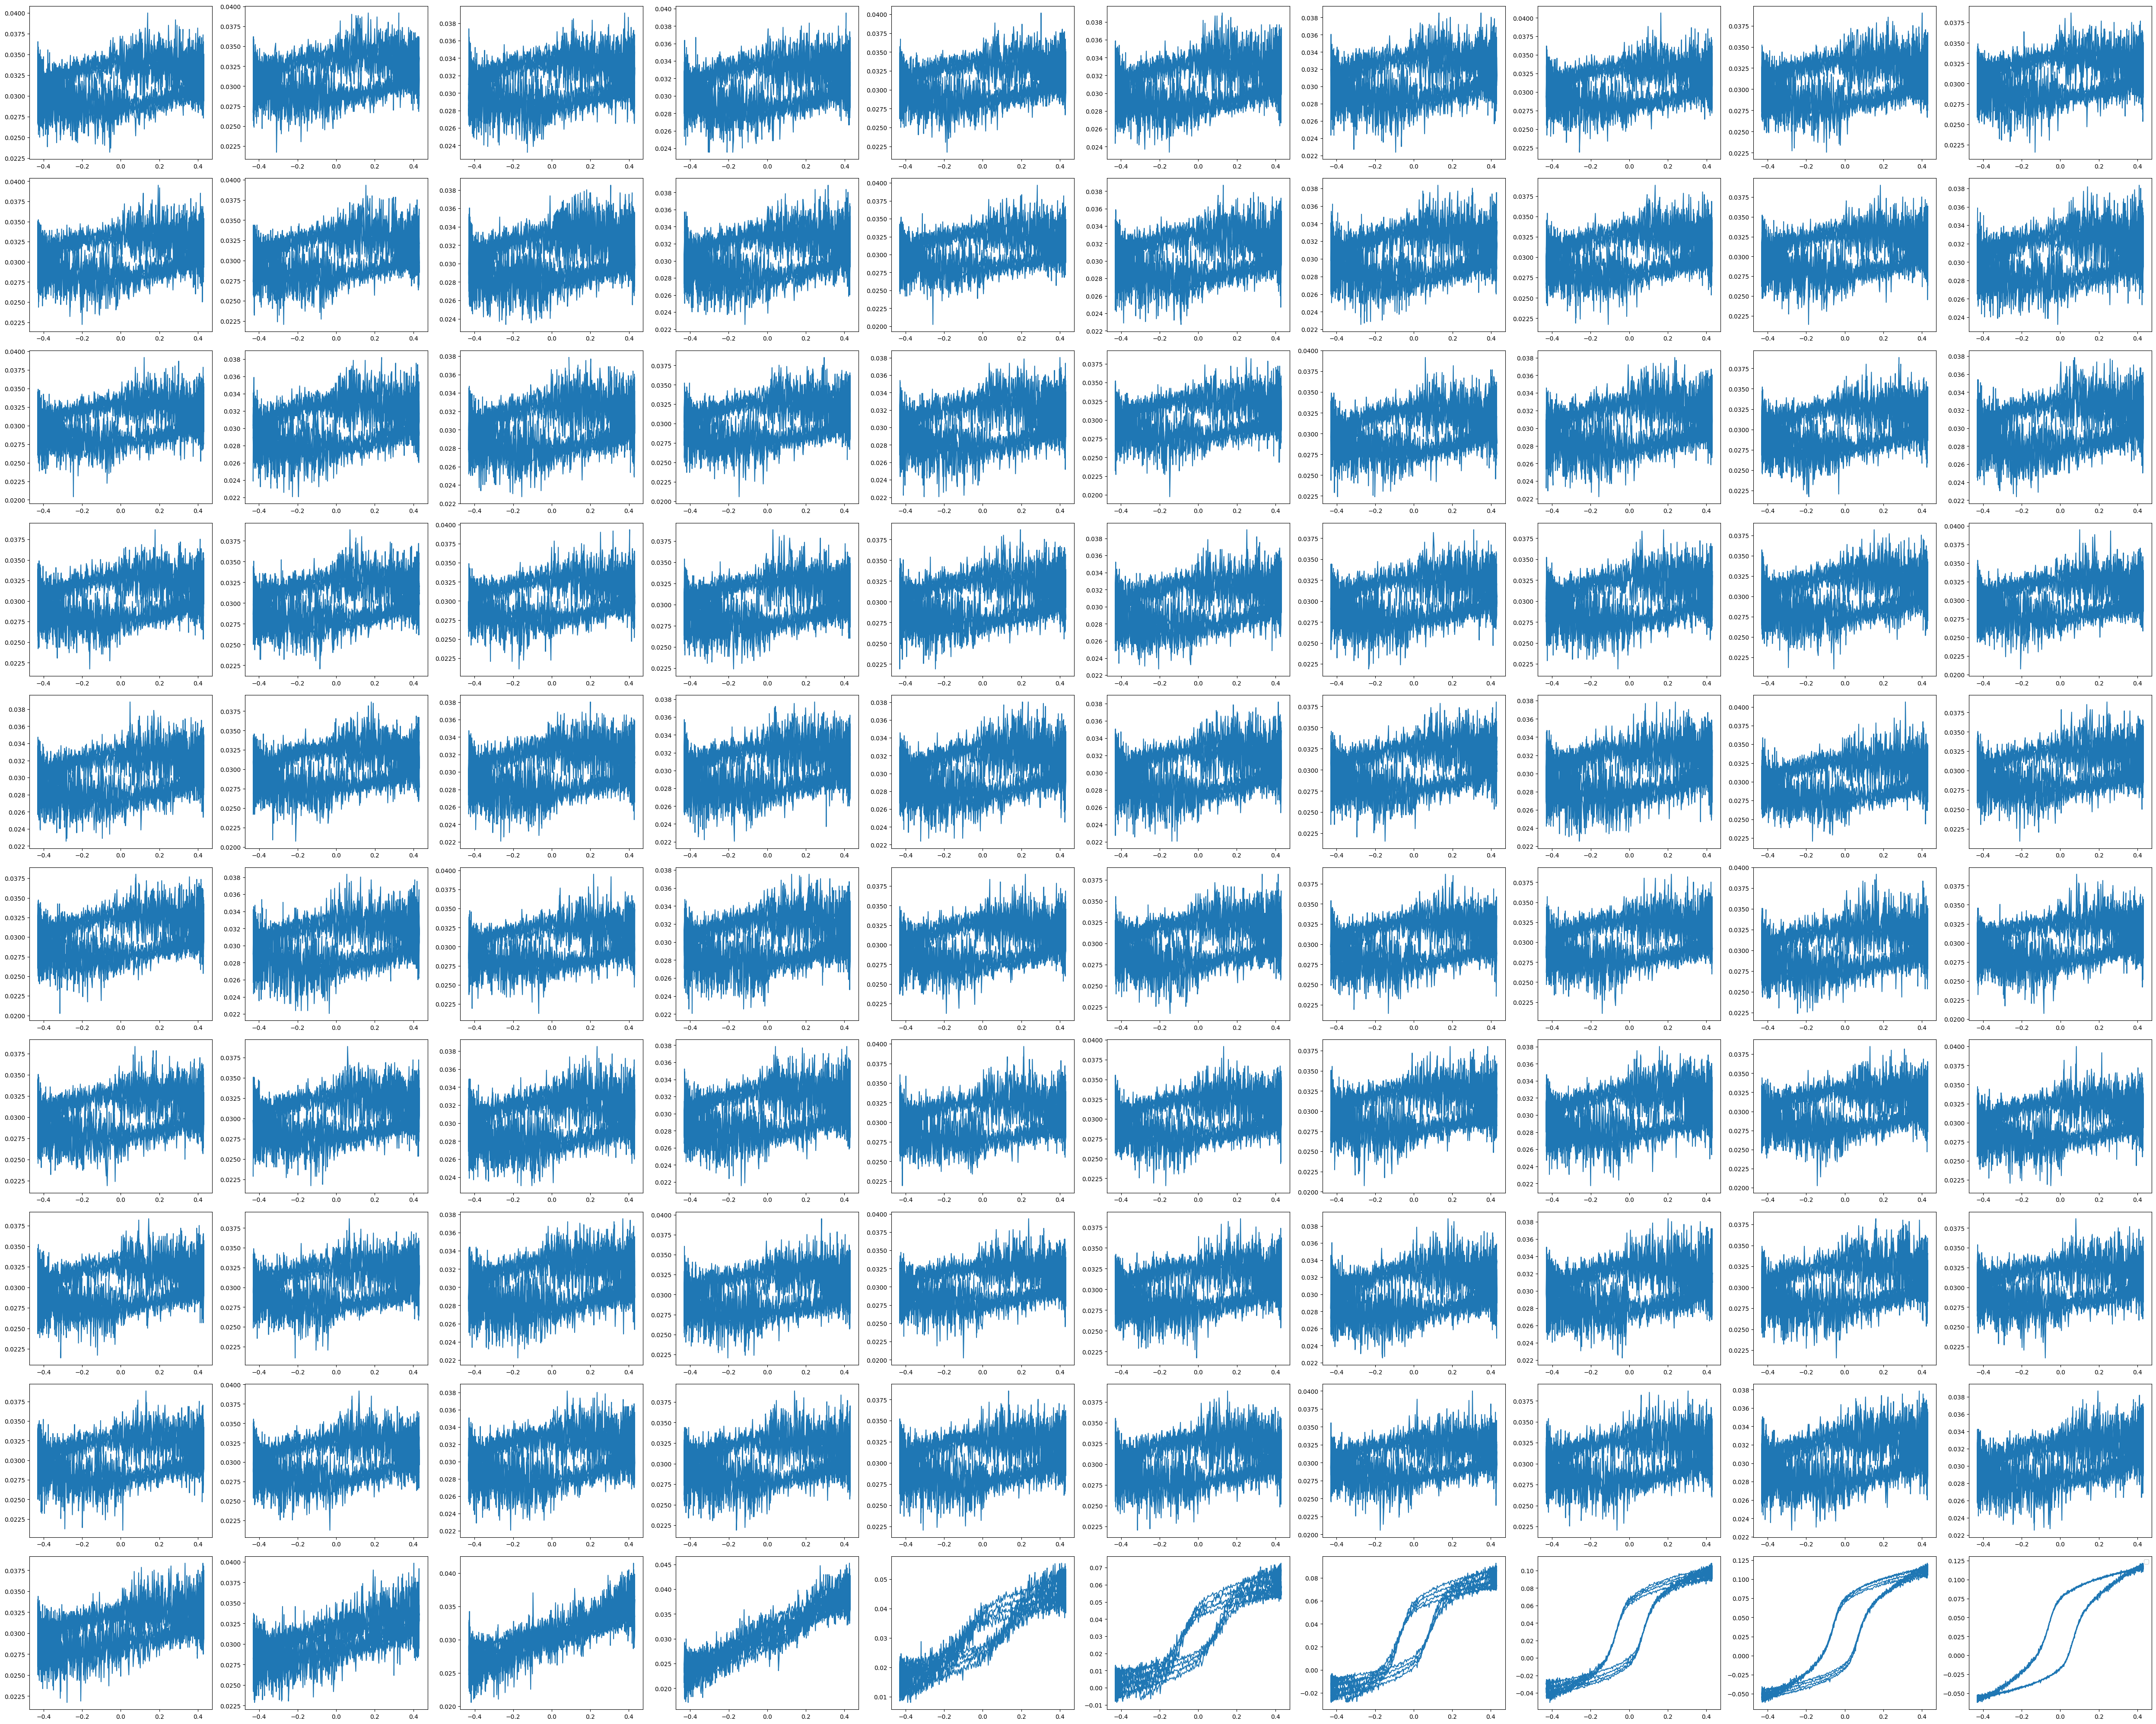

In [94]:
filas = 10
columnas = 10

fig, axes = plt.subplots(filas, columnas, figsize=(columnas*5, filas*4))

for j in range(filas * columnas):
    i =  j * 1
    if j < len(X):
        fila = j // columnas
        col = j % columnas
        
        axes[fila, col].plot(np.array(X[i]), np.array(Y[i]))
      

plt.tight_layout()
plt.legend()
plt.show()

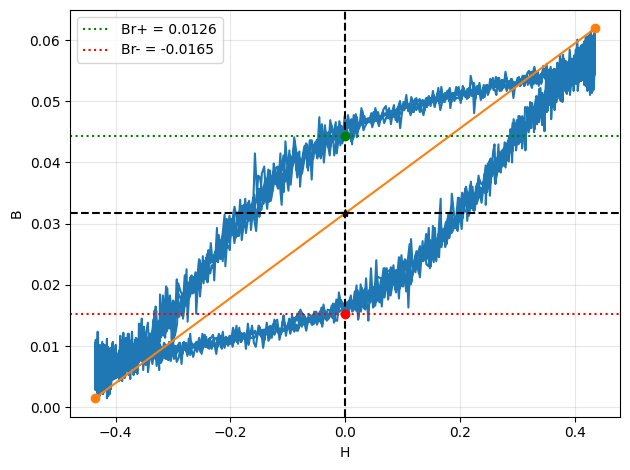

In [121]:
def encontrar_br(H, B, plot=False):
    H, B = np.array(H), np.array(B)
    

    offset_B = (np.max(B) + np.min(B)) / 2
    offset_H = (np.max(H) + np.min(H)) / 2

    H_cent = H - offset_H
    B_cent = B - offset_B
    
    # Buscar cruces por cero
    sign_changes = np.where(np.diff(np.sign(H_cent)))[0]
    Br_pos_cent, Br_neg_cent = None, None
    
    # Br+ (último cruce)
    for i in range(len(sign_changes)-1, -1, -1):
        idx = sign_changes[i]
        if H_cent[idx] > 0 and H_cent[idx+1] < 0:
            if H_cent[idx+1] != H_cent[idx]:
                Br_pos_cent = B_cent[idx] + (0 - H_cent[idx]) * \
                             (B_cent[idx+1] - B_cent[idx]) / (H_cent[idx+1] - H_cent[idx])
            break
    
    # Br- (primer cruce)
    for idx in sign_changes:
        if H_cent[idx] < 0 and H_cent[idx+1] > 0:
            if H_cent[idx+1] != H_cent[idx]:
                Br_neg_cent = B_cent[idx] + (0 - H_cent[idx]) * \
                             (B_cent[idx+1] - B_cent[idx]) / (H_cent[idx+1] - H_cent[idx])
            break
    if plot:
        plt.figure()
        plt.plot(H, B)
        plt.plot([np.min(H), np.max(H)], [np.min(B), np.max(B)], "o-")
        plt.plot(offset_H, offset_B, "k*")
        plt.axhline(y=offset_B, color='k', linestyle='--')
        plt.axvline(x=offset_H, color='k', linestyle='--')    

        if Br_pos_cent is not None:
            Br_pos = Br_pos_cent + offset_B
            plt.axhline(y=Br_pos, color='g', linestyle=':', label=f'Br+ = {Br_pos_cent:.4f}')
            plt.plot(offset_H, Br_pos, 'go')
        
        if Br_neg_cent is not None:
            Br_neg = Br_neg_cent + offset_B
            plt.axhline(y=Br_neg, color='r', linestyle=':', label=f'Br- = {Br_neg_cent:.4f}')
            plt.plot(offset_H, Br_neg, 'ro')
        
        plt.xlabel("H")
        plt.ylabel("B")
        plt.grid(True, alpha=0.3)
        if Br_pos_cent is not None or Br_neg_cent is not None:
            plt.legend()
        plt.tight_layout()
        plt.show()
    
    return Br_pos_cent, Br_neg_cent


H = H_depurado[3000]  
B = B_depurado[3000]  

B_pos, B_neg = encontrar_br(H, B, True)

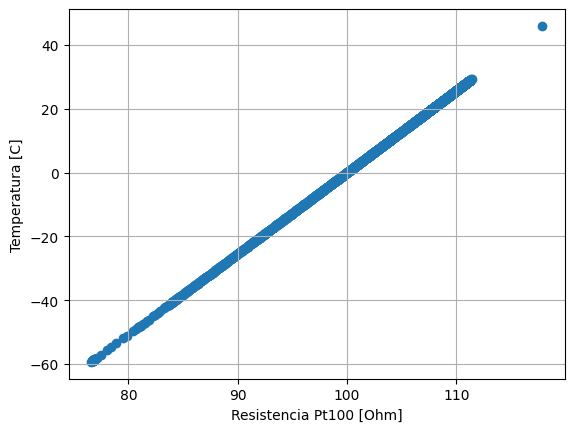

In [120]:
a = 1
b = -100
def temperatura(res):
    return res * a + b

def temp_kelv(res):
    return res * 0.00385 + 273.23 - 0.385

def resistencia_platino(V_plat, V_R, res=2000):
    return np.abs(V_plat / V_R) * res

v_arr = [[],[]]

V_R       = [string_to_list(x) for x in datos_medicion["V_R"].iloc[1:]]
V_platino = [string_to_list(y) for y in datos_medicion["V_platino"].iloc[1:]]

for i in range(len(V_platino) - 1):
    v_arr[0].append((np.std(np.array(V_platino[i+1]))))
    v_arr[1].append((np.std(np.array(V_R[i+1]))))



def PT100_res2temp_interp(R): #np.mean
    data = np.loadtxt('Pt100_resistencia_temperatura.csv',delimiter=',') 
    temperature_vals = data[:,0] # en Celsius
    resistance_vals = data[:,1] #en Ohm
    return np.interp(R, resistance_vals, temperature_vals)

R = resistencia_platino(np.array(v_arr[0]),  np.array(v_arr[1]))
plt.scatter(R, PT100_res2temp_interp(R))
plt.ylabel('Temperatura [C]')
plt.xlabel('Resistencia Pt100 [Ohm]')
plt.grid(True)